最小值点: x = 0.000004, f(x) = 2.000000
迭代次数: 62


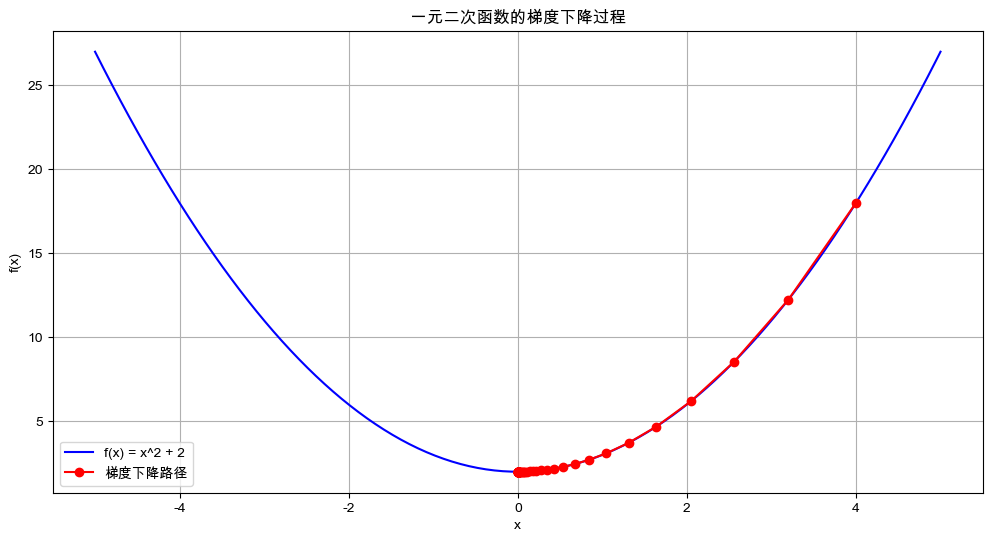

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义一元二次函数 f(x) = x^2 + 2
def f(x):
    return x**2 + 2

# 定义导数函数 f'(x) = 2x
def df(x):
    return 2*x

# 设置参数
learning_rate = 0.1  # 学习率
max_iterations = 100  # 最大迭代次数
x = 4.0  # 初始x值
tolerance = 1e-6  # 收敛阈值

# 记录每次迭代的x值和对应的函数值
x_history = [x]
y_history = [f(x)]

# 梯度下降迭代
for i in range(max_iterations):
    gradient = df(x)
    x_new = x - learning_rate * gradient
    
    # 记录历史
    x_history.append(x_new)
    y_history.append(f(x_new))
    
    # 检查是否收敛
    if abs(x_new - x) < tolerance:
        break
    
    x = x_new
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # Mac系统中文字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 可视化
plt.figure(figsize=(12, 6))

# 绘制函数曲线
x_curve = np.linspace(-5, 5, 200)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, 'b-', label='f(x) = x^2 + 2')

# 绘制梯度下降路径
plt.plot(x_history, y_history, 'ro-', label='梯度下降路径')

plt.grid(True)
plt.legend()
plt.title('一元二次函数的梯度下降过程')
plt.xlabel('x')
plt.ylabel('f(x)')

# 打印最终结果
print(f'最小值点: x = {x_history[-1]:.6f}, f(x) = {y_history[-1]:.6f}')
print(f'迭代次数: {len(x_history)-1}')


特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
数据集形状: (20640, 8)
目标变量形状: (20640,)
模型评估结果：
均方误差 (MSE): 0.5506
均方根误差 (RMSE): 0.7420
决定系数 (R²): 0.5798

模型参数：
截距: 2.0573
特征系数:
MedInc: 0.8126
HouseAge: 0.1148
AveRooms: -0.2503
AveBedrms: 0.3024
Population: 0.0023
AveOccup: -0.1365
Latitude: -0.9093
Longitude: -0.8906


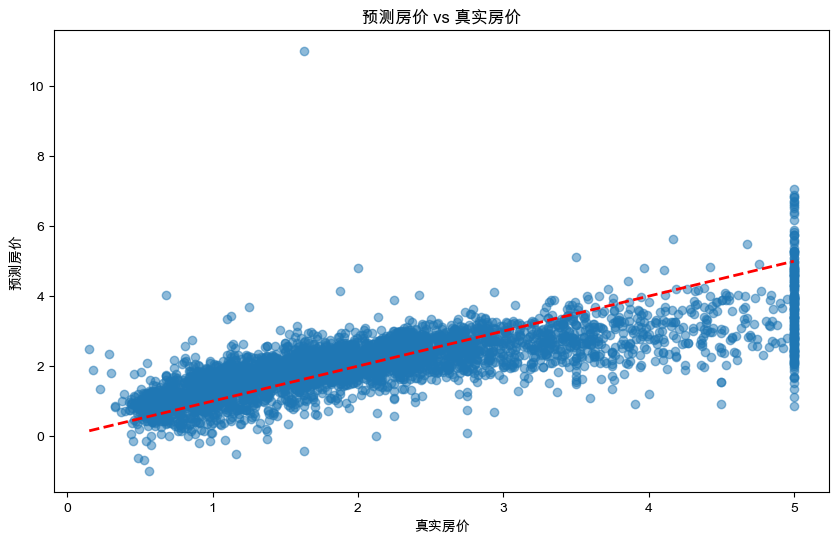

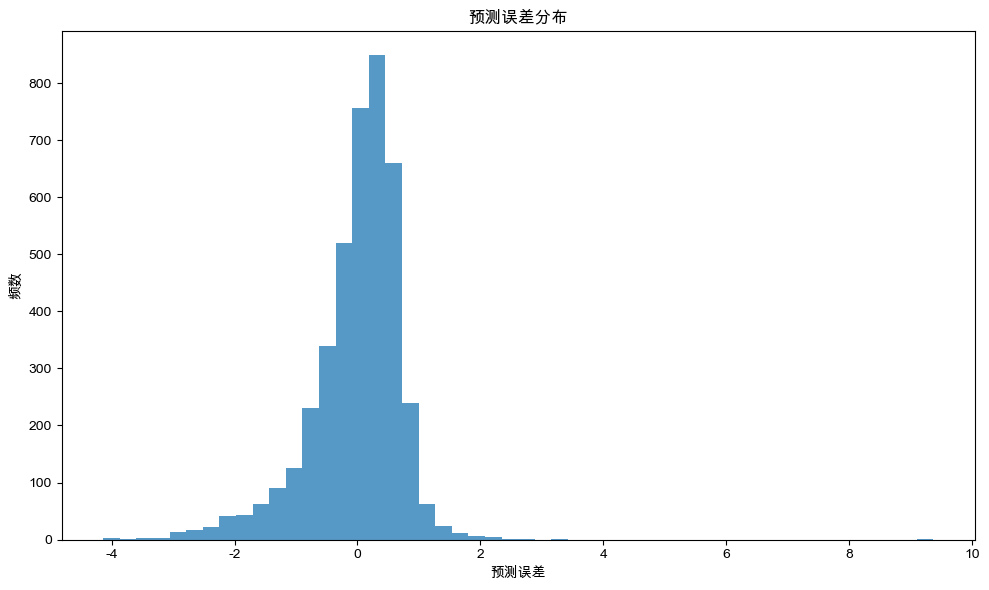

In [8]:
# 导入必要的库
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib
import os

# 加载加利福尼亚房价数据集
housing = fetch_california_housing(data_home = './data')
X = housing.data
y = housing.target
# 查看数据集信息
print("特征名称:", housing.feature_names)
print("数据集形状:", X.shape)
print("目标变量形状:", y.shape)

# # 数据标准化
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# print("\n标准化后的数据统计信息:")
# print(f"平均值: {X.mean():.4f}")
# print(f"标准差: {X.std():.4f}")

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建并训练SGD线性回归模型
model = SGDRegressor(
    loss='squared_error',  # 损失函数选择平方误差
    penalty='l2',  # 正则化方法
    alpha=0.0001,  # 正则化强度
    max_iter=1000,  # 最大迭代次数
    learning_rate='invscaling',  # 学习率调整策略
    eta0=0.01,  # 初始学习率
    random_state=42
)

model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test_scaled)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("模型评估结果：")
print(f"均方误差 (MSE): {mse:.4f}")
print(f"均方根误差 (RMSE): {rmse:.4f}")
print(f"决定系数 (R²): {r2:.4f}")

# 打印模型参数
print("\n模型参数：")
print(f"截距: {model.intercept_[0]:.4f}")
print("特征系数:")
for feature, coef in zip(housing.feature_names, model.coef_):
    print(f"{feature}: {coef:.4f}")

# 设置matplotlib支持中文显示
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # Mac系统设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建预测值与真实值对比图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.title('预测房价 vs 真实房价')

# 创建预测误差分布图
errors = y_pred - y_test
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.75)
plt.xlabel('预测误差')
plt.ylabel('频数')
plt.title('预测误差分布')
plt.tight_layout()
plt.show()


特征中的缺失值:
0
目标变量中的缺失值: 0

数据集完整，没有缺失值或无穷大值。
特征名称: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
数据集形状: (20640, 8)
目标变量形状: (20640,)
[1.03    3.821   1.726   0.934   0.965   2.648   1.573   5.00001 1.398
 3.156  ]
均方误差 (MSE): 0.5506

模型回归系数:
MedInc: 0.8126
HouseAge: 0.1148
AveRooms: -0.2503
AveBedrms: 0.3024
Population: 0.0023
AveOccup: -0.1365
Latitude: -0.9093
Longitude: -0.8906
截距: 2.0573

模型和标准化器已保存


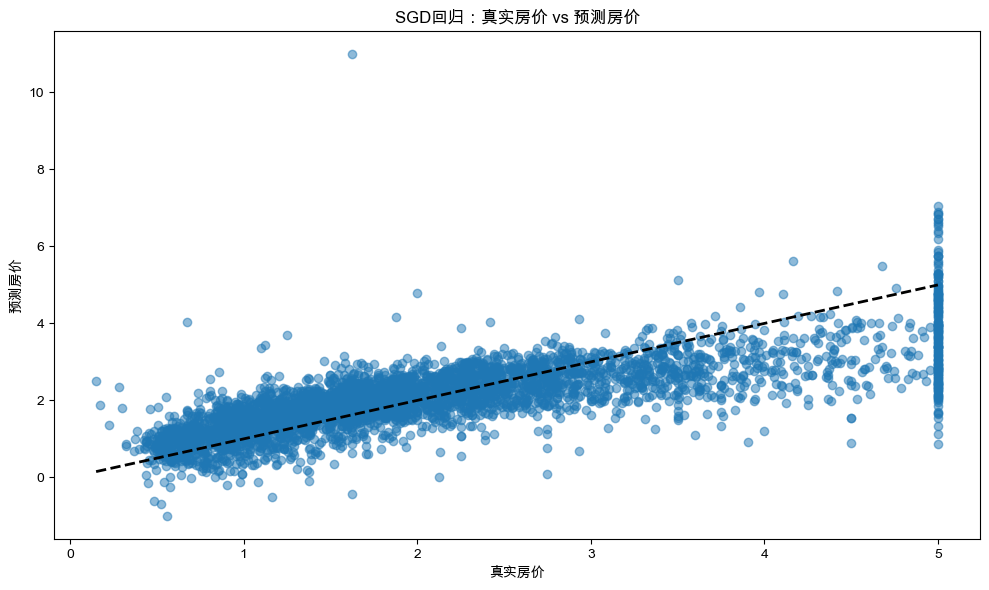

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# 加载加利福尼亚房价数据集
housing = fetch_california_housing(data_home='./data')
X = housing.data
y = housing.target
# 检查数据集中是否存在缺失值
missing_values = np.isnan(X).sum()
print("特征中的缺失值:")
print(missing_values)

missing_target = np.isnan(y).sum()
print(f"目标变量中的缺失值: {missing_target}")


# 数据完整性总结
if missing_values.sum() == 0 and missing_target == 0:
    print("\n数据集完整，没有缺失值或无穷大值。")
else:
    print("\n数据集存在缺失值或无穷大值，需要进行数据清洗。")

# 查看数据集信息
print("特征名称:", housing.feature_names)
print("数据集形状:", X.shape)
print("目标变量形状:", y.shape)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train[:10])

# 对特征进行标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建SGD回归模型，tol是停止条件，当相邻两次迭代的目标函数值（如损失函数）差值 ≤ tol 时，算法停止
#invscaling代表学习率随迭代次数衰减，eta0是初始学习率
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42, eta0=0.01) #SGD回归模型

# 训练模型
sgd_model.fit(X_train_scaled, y_train)

# 预测
y_pred = sgd_model.predict(X_test_scaled)

# 评估模型,均方误差
mse = mean_squared_error(y_test, y_pred)

print(f"均方误差 (MSE): {mse:.4f}")

# 查看模型回归系数
print("\n模型回归系数:")
for name, coef in zip(housing.feature_names, sgd_model.coef_):
    print(f"{name}: {coef:.4f}")
print(f"截距: {sgd_model.intercept_[0]:.4f}")


# 可视化预测结果与真实值的对比
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # Mac系统使用Arial Unicode MS字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.title('SGD回归：真实房价 vs 预测房价')
plt.tight_layout()
plt.show()


### 正则化：给原本不能解的方程加一个补偿，使它更加合理，就可以解了

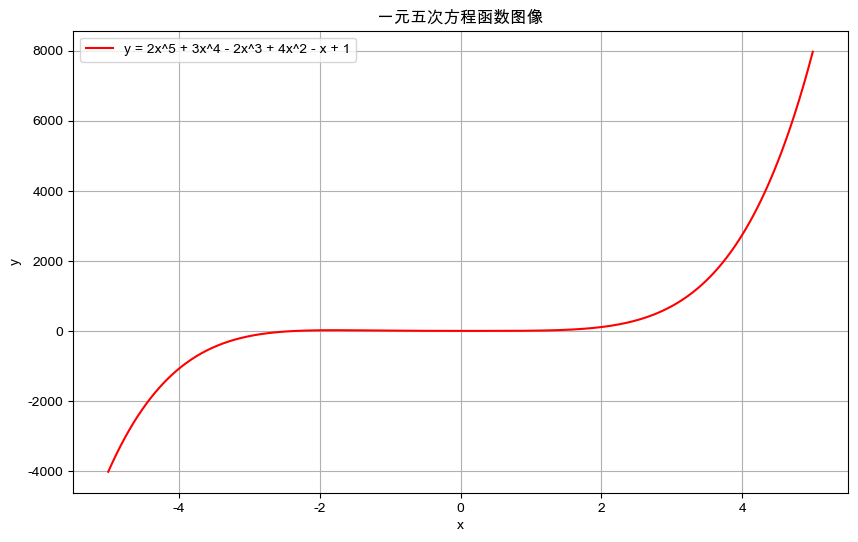

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 生成x值
x = np.linspace(-5, 5, 1000)

# 计算y值 (一元五次方程)
y = 2*x**5 + 3*x**4 - 2*x**3 + 4*x**2 - x + 1

# 绘制函数图像
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r-', label='y = 2x^5 + 3x^4 - 2x^3 + 4x^2 - x + 1')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('一元五次方程函数图像')
plt.legend()
plt.show()


In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 加载加利福尼亚房价数据集
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 数据集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建并训练Lasso回归模型
lasso = Lasso(alpha=0.1)  # alpha是正则化参数
lasso.fit(X_train_scaled, y_train)

# 创建并训练岭回归模型
ridge = Ridge(alpha=1.0)  # alpha是正则化参数
ridge.fit(X_train_scaled, y_train)

# 模型预测
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)

# 评估模型性能
print("Lasso回归评估结果：")
print(f"均方误差(MSE): {mean_squared_error(y_test, y_pred_lasso):.4f}")
print(f"R2分数: {r2_score(y_test, y_pred_lasso):.4f}")
print(f"模型系数: {lasso.coef_}")
print("\n岭回归评估结果：")
print(f"均方误差(MSE): {mean_squared_error(y_test, y_pred_ridge):.4f}")
print(f"R2分数: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"模型系数: {ridge.coef_}")

# 特征重要性分析
feature_importance = pd.DataFrame({
    'Feature': housing.feature_names,
    'Lasso_coef': lasso.coef_,
    'Ridge_coef': ridge.coef_
})
print("\n特征重要性对比：")
print(feature_importance)


Lasso回归评估结果：
均方误差(MSE): 0.6796
R2分数: 0.4814
模型系数: [ 0.71059779  0.1064527  -0.          0.         -0.         -0.
 -0.01146856 -0.        ]

岭回归评估结果：
均方误差(MSE): 0.5559
R2分数: 0.5758
模型系数: [ 0.85432679  0.12262397 -0.29421036  0.33900794 -0.00228221 -0.04083302
 -0.89616759 -0.86907074]

特征重要性对比：
      Feature  Lasso_coef  Ridge_coef
0      MedInc    0.710598    0.854327
1    HouseAge    0.106453    0.122624
2    AveRooms   -0.000000   -0.294210
3   AveBedrms    0.000000    0.339008
4  Population   -0.000000   -0.002282
5    AveOccup   -0.000000   -0.040833
6    Latitude   -0.011469   -0.896168
7   Longitude   -0.000000   -0.869071
